In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.special import erf

plt.style.use('default')
sns.set_palette("husl")

In [96]:

dataset_path = '../datasets/teen_phone_addiction_dataset.csv'
data_frame = pd.read_csv(dataset_path)

print(data_frame.head())
print(f"\nРазмер датасета: {data_frame.shape}")
print(f"Количество записей: {len(data_frame)}")

   ID               Name  Age  Gender          Location School_Grade  \
0   1    Shannon Francis   13  Female        Hansonfort          9th   
1   2    Scott Rodriguez   17  Female      Theodorefort          7th   
2   3        Adrian Knox   13   Other       Lindseystad         11th   
3   4  Brittany Hamilton   18  Female      West Anthony         12th   
4   5       Steven Smith   14   Other  Port Lindsaystad          9th   

   Daily_Usage_Hours  Sleep_Hours  Academic_Performance  Social_Interactions  \
0                4.0          6.1                    78                    5   
1                5.5          6.5                    70                    5   
2                5.8          5.5                    93                    8   
3                3.1          3.9                    78                    8   
4                2.5          6.7                    56                    4   

   ...  Screen_Time_Before_Bed  Phone_Checks_Per_Day  Apps_Used_Daily  \
0  ...       

In [97]:
N = 21
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']

col = cols[N % 7]
print(col)

feat = df[col]
feat.head()

Daily_Usage_Hours


0    4.0
1    5.5
2    5.8
3    3.1
4    2.5
Name: Daily_Usage_Hours, dtype: float64

# Часть I. Расчет статистических характеристик и построение графиков

In [98]:
def calculate_and_display_statistics(data_series):
    """
    Функция для вычисления и отображения основных статистических характеристик
    """
    # Заголовок анализа
    print("*" * 70)
    print(f"СТАТИСТИЧЕСКИЙ АНАЛИЗ ПЕРЕМЕННОЙ: {data_series.name}")
    print("*" * 70)
    
    # Вычисление основных характеристик
    mean_val = data_series.mean()
    variance_val = data_series.var()
    median_val = data_series.median()
    
    # Поиск модального значения
    modal_values = data_series.mode()
    if not modal_values.empty:
        mode_val = modal_values.iloc[0]
        print(f"Мода (наиболее частое значение):     {mode_val:.4f}")
    else:
        print(f"Мода:                                не определена")
    
    # Основные характеристики центральной тенденции
    print(f"Арифметическое среднее:              {mean_val:.4f}")
    print(f"Медиана (50-й процентиль):           {median_val:.4f}")
    print(f"Выборочная дисперсия:                {variance_val:.4f}")
    
    # Квантили распределения
    percentile_25 = data_series.quantile(0.25)
    percentile_50 = data_series.quantile(0.50)  
    percentile_75 = data_series.quantile(0.75)
    
    print(f"\nКВАНТИЛИ РАСПРЕДЕЛЕНИЯ:")
    print(f"25-й процентиль (Q1):                {percentile_25:.4f}")
    print(f"50-й процентиль (Q2, медиана):       {percentile_50:.4f}")
    print(f"75-й процентиль (Q3):                {percentile_75:.4f}")
    
    # Интерквартильный размах
    interquartile_range = percentile_75 - percentile_25
    print(f"Интерквартильное расстояние (IQR):   {interquartile_range:.4f}")
    
    # Характеристики формы распределения
    skewness_val = data_series.skew()
    kurtosis_val = data_series.kurtosis()
    print(f"\nХАРАКТЕРИСТИКИ ФОРМЫ:")
    print(f"Коэффициент асимметрии:              {skewness_val:.4f}")
    print(f"Коэффициент эксцесса:                {kurtosis_val:.4f}")
    
    # Визуализация данных
    print("\n" + "*" * 70)
    print("ГРАФИЧЕСКОЕ ПРЕДСТАВЛЕНИЕ ДАННЫХ")
    print("*" * 70)
    
    # Определение количества интервалов по правилу Стерджеса
    bins_count = int(np.log2(data_series.size) + 1)
    
    # Создание графиков
    figure, (histogram_ax, cdf_ax) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Гистограмма распределения
    histogram_ax.hist(data_series, bins=bins_count, alpha=0.75, 
                     color='lightcoral', edgecolor='darkred', linewidth=1.2)
    histogram_ax.set_title(f'Распределение частот: {data_series.name}', fontsize=12, fontweight='bold')
    histogram_ax.set_xlabel('Значения переменной', fontsize=11)
    histogram_ax.set_ylabel('Абсолютная частота', fontsize=11)
    histogram_ax.grid(True, alpha=0.4, linestyle='--')
    
    # Добавление линий среднего и медианы
    histogram_ax.axvline(mean_val, color='blue', linestyle='-', linewidth=2, 
                        label=f'Среднее: {mean_val:.2f}')
    histogram_ax.axvline(median_val, color='green', linestyle='-', linewidth=2, 
                        label=f'Медиана: {median_val:.2f}')
    histogram_ax.legend(loc='upper right')
    
    # Эмпирическая функция распределения
    sorted_values = np.sort(data_series.dropna())
    cumulative_probs = np.arange(1, len(sorted_values) + 1) / len(sorted_values)
    
    cdf_ax.step(sorted_values, cumulative_probs, where='post', 
               color='navy', linewidth=2.5, alpha=0.8)
    cdf_ax.set_title(f'Эмпирическая CDF: {data_series.name}', fontsize=12, fontweight='bold')
    cdf_ax.set_xlabel('Значения переменной', fontsize=11)
    cdf_ax.set_ylabel('Накопленная вероятность F(x)', fontsize=11)
    cdf_ax.grid(True, alpha=0.4, linestyle='--')
    cdf_ax.set_ylim(0, 1.05)
    
    # Отметки квантилей на CDF
    cdf_ax.axvline(percentile_25, color='purple', linestyle='-.', alpha=0.7, 
                  label=f'Q1: {percentile_25:.2f}')
    cdf_ax.axvline(percentile_50, color='orange', linestyle='-.', alpha=0.7, 
                  label=f'Q2: {percentile_50:.2f}')
    cdf_ax.axvline(percentile_75, color='red', linestyle='-.', alpha=0.7, 
                  label=f'Q3: {percentile_75:.2f}')
    cdf_ax.legend(loc='lower right')
    
    plt.tight_layout()
    plt.show()

**********************************************************************
СТАТИСТИЧЕСКИЙ АНАЛИЗ ПЕРЕМЕННОЙ: Daily_Usage_Hours
**********************************************************************
Мода (наиболее частое значение):     4.4000
Арифметическое среднее:              5.0207
Медиана (50-й процентиль):           5.0000
Выборочная дисперсия:                3.8279

КВАНТИЛИ РАСПРЕДЕЛЕНИЯ:
25-й процентиль (Q1):                3.7000
50-й процентиль (Q2, медиана):       5.0000
75-й процентиль (Q3):                6.4000
Интерквартильное расстояние (IQR):   2.7000

ХАРАКТЕРИСТИКИ ФОРМЫ:
Коэффициент асимметрии:              0.0162
Коэффициент эксцесса:                -0.1208

**********************************************************************
ГРАФИЧЕСКОЕ ПРЕДСТАВЛЕНИЕ ДАННЫХ
**********************************************************************


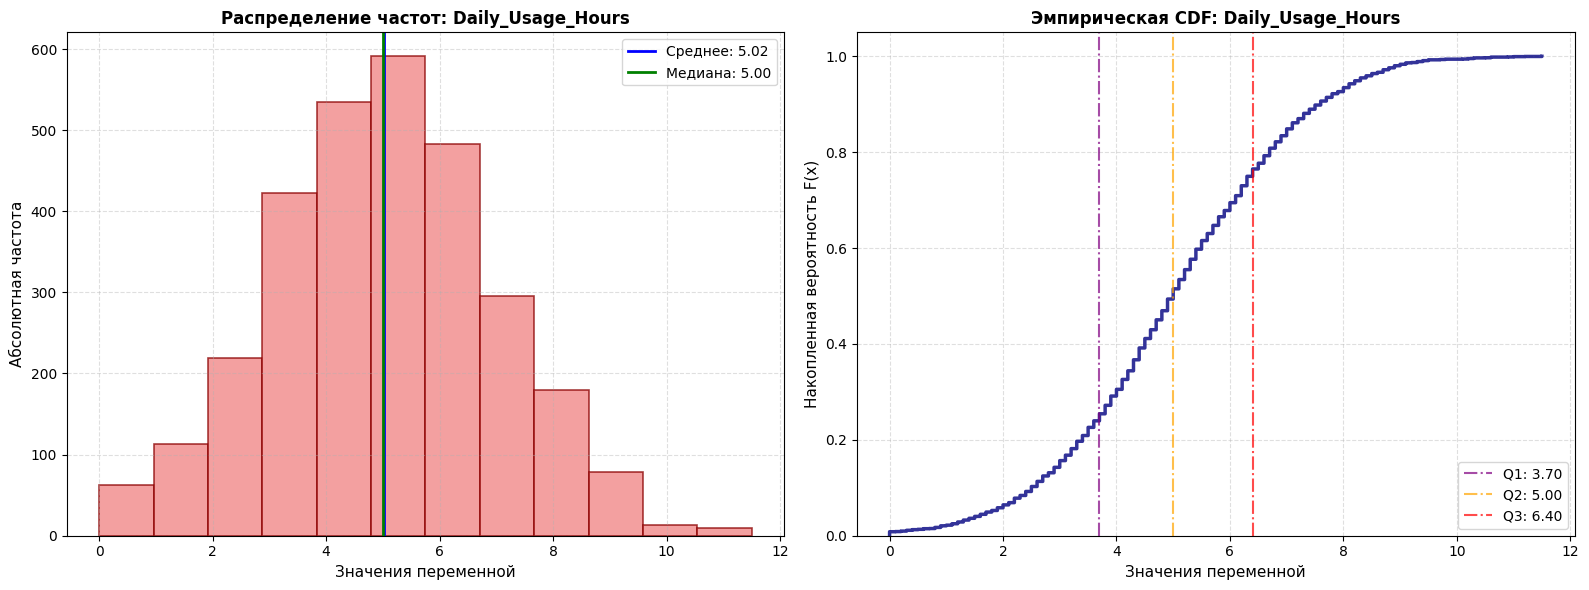

In [99]:
# Выполнение статистического анализа выбранной переменной
calculate_and_display_statistics(analyzed_feature)

## Задание 2

In [100]:
# Вспомогательные функции для реализации критерия хи-квадрат

def normal_distribution_cdf(mean_value, std_dev, x_value):
    """
    Вычисление функции распределения стандартного нормального распределения
    Использует функцию ошибок (erf) для точного расчета
    """
    standardized_value = (x_value - mean_value) / std_dev
    return 0.5 * (1 + erf(standardized_value / np.sqrt(2)))


def create_histogram_intervals(dataset, num_intervals=None):
    """
    Создание интервалов для гистограммы
    По умолчанию использует правило Стерджеса для определения количества интервалов
    """
    if num_intervals is None:
        num_intervals = int(1 + np.log2(len(dataset)))
    
    data_min = np.min(dataset)
    data_max = np.max(dataset)
    
    # Создание равномерных интервалов
    interval_boundaries = np.linspace(data_min, data_max, num_intervals + 1)
    observed_frequencies, _ = np.histogram(dataset, bins=interval_boundaries)
    
    return np.array(observed_frequencies), np.array(interval_boundaries)


def compute_theoretical_frequencies(dataset, sample_mean, sample_std):
    """
    Расчет теоретических частот для нормального распределения
    """
    sample_size = len(dataset)
    empirical_frequencies, interval_bounds = create_histogram_intervals(dataset)
    theoretical_frequencies = []
    
    # Вычисление вероятностей для каждого интервала
    for idx in range(len(interval_bounds) - 1):
        left_boundary = interval_bounds[idx]
        right_boundary = interval_bounds[idx + 1]
        
        # Вероятность попадания в интервал [left, right)
        prob_left = normal_distribution_cdf(sample_mean, sample_std, left_boundary)
        prob_right = normal_distribution_cdf(sample_mean, sample_std, right_boundary)
        interval_probability = prob_right - prob_left
        
        theoretical_frequencies.append(round(sample_size * interval_probability))
    
    return np.array(theoretical_frequencies), empirical_frequencies


def compute_chi_square_value(observed_frequencies, expected_frequencies):
    """
    Вычисление значения статистики хи-квадрат
    """
    chi_square_sum = 0
    
    for idx in range(len(observed_frequencies)):
        if expected_frequencies[idx] > 0:
            chi_square_sum += (observed_frequencies[idx] - expected_frequencies[idx])**2 / expected_frequencies[idx]
    
    return chi_square_sum

In [101]:
def perform_chi_square_normality_test(sample_data, significance_level=0.05):
    """
    Проведение теста хи-квадрат для проверки гипотезы о нормальности распределения
    """
    print("+" * 65)
    print("ТЕСТ ХИ-КВАДРАТ НА НОРМАЛЬНОСТЬ РАСПРЕДЕЛЕНИЯ")
    print("+" * 65)
    
    # Базовые параметры выборки
    sample_size = len(sample_data)
    sample_mean = np.mean(sample_data)
    sample_standard_deviation = np.std(sample_data, ddof=1)
    
    print(f"Объем выборки:                           {sample_size}")
    print(f"Выборочное среднее (μ̂):                   {sample_mean:.4f}")
    print(f"Выборочное стандартное отклонение (σ̂):   {sample_standard_deviation:.4f}")
    
    # Получение теоретических и эмпирических частот
    theoretical_frequencies, empirical_frequencies = compute_theoretical_frequencies(
        sample_data, sample_mean, sample_standard_deviation)
    
    # Объединение интервалов с малыми ожидаемыми частотами
    minimum_expected_frequency = 5
    aggregated_observed = []
    aggregated_expected = []
    
    temp_observed = 0
    temp_expected = 0
    
    for idx in range(len(empirical_frequencies)):
        temp_observed += empirical_frequencies[idx]
        temp_expected += theoretical_frequencies[idx]
        
        # Объединяем интервалы до достижения минимальной ожидаемой частоты
        if temp_expected >= minimum_expected_frequency or idx == len(empirical_frequencies) - 1:
            aggregated_observed.append(temp_observed)
            aggregated_expected.append(temp_expected)
            temp_observed = 0
            temp_expected = 0
    
    # Преобразование в массивы numpy
    final_observed_frequencies = np.array(aggregated_observed)
    final_expected_frequencies = np.array(aggregated_expected)
    
    print(f"\nИнтервалов после объединения:            {len(final_observed_frequencies)}")
    print(f"Наблюдаемые частоты:                     {final_observed_frequencies}")
    print(f"Теоретические частоты:                   {final_expected_frequencies.round(2)}")
    
    # Вычисление статистики хи-квадрат
    chi_square_statistic = compute_chi_square_value(final_observed_frequencies, final_expected_frequencies)
    
    # Степени свободы: количество интервалов - 1 - количество оцененных параметров (среднее и дисперсия)
    degrees_of_freedom = len(final_observed_frequencies) - 1 - 2
    
    print(f"\nЗначение статистики χ²:                  {chi_square_statistic:.4f}")
    print(f"Число степеней свободы:                  {degrees_of_freedom}")
    
    # Проверка на достаточность степеней свободы
    if degrees_of_freedom <= 0:
        print("ВНИМАНИЕ: Недостаточно степеней свободы для корректного проведения теста")
        return None
    
    # Критическое значение и p-value
    critical_chi_square = stats.chi2.ppf(1 - significance_level, degrees_of_freedom)
    p_value = 1 - stats.chi2.cdf(chi_square_statistic, degrees_of_freedom)
    
    print(f"Критическое значение (α={significance_level}):         {critical_chi_square:.4f}")
    print(f"Наблюдаемый уровень значимости (p):      {p_value:.4f}")
    
    # Принятие решения о гипотезе
    hypothesis_accepted = chi_square_statistic <= critical_chi_square
    print(f"\n{'='*50}")
    print("ЗАКЛЮЧЕНИЕ ПО ТЕСТУ:")
    if hypothesis_accepted:
        print("✓ Гипотеза о нормальности распределения НЕ ОТВЕРГАЕТСЯ")
        print("  Данные совместимы с нормальным распределением")
    else:
        print("✗ Гипотеза о нормальности распределения ОТВЕРГАЕТСЯ")
        print("  Данные НЕ совместимы с нормальным распределением")
    print("="*50)
    
    # Возвращаемый результат
    return {
        'chi_square_value': chi_square_statistic,
        'degrees_of_freedom': degrees_of_freedom,
        'p_value': p_value,
        'critical_value': critical_chi_square,
        'normality_accepted': hypothesis_accepted
    }


In [102]:
# Применение критерия хи-квадрат для проверки нормальности
chi_square_test_results = perform_chi_square_normality_test(analyzed_feature)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
ТЕСТ ХИ-КВАДРАТ НА НОРМАЛЬНОСТЬ РАСПРЕДЕЛЕНИЯ
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Объем выборки:                           3000
Выборочное среднее (μ̂):                   5.0207
Выборочное стандартное отклонение (σ̂):   1.9565

Интервалов после объединения:            12
Наблюдаемые частоты:                     [ 62 113 219 422 535 591 483 295 180  78  13   9]
Теоретические частоты:                   [ 41 112 240 407 544 576 481 318 166  69  22   6]

Значение статистики χ²:                  22.9032
Число степеней свободы:                  9
Критическое значение (α=0.05):         16.9190
Наблюдаемый уровень значимости (p):      0.0064

ЗАКЛЮЧЕНИЕ ПО ТЕСТУ:
✗ Гипотеза о нормальности распределения ОТВЕРГАЕТСЯ
  Данные НЕ совместимы с нормальным распределением


In [103]:
def analyze_distribution_shape_parameters(dataset, alpha_level=0.05):
    """
    Анализ параметров формы распределения (асимметрия и эксцесс) 
    для проверки гипотезы нормальности
    """
    
    # Очистка данных от пропущенных значений
    cleaned_dataset = dataset.dropna()
    observations_count = len(cleaned_dataset)
    
    # Вычисление коэффициентов формы распределения
    asymmetry_coefficient = cleaned_dataset.skew()
    excess_kurtosis_coefficient = cleaned_dataset.kurtosis()  # избыточный эксцесс
    
    print("~" * 70)
    print("АНАЛИЗ ПАРАМЕТРОВ ФОРМЫ РАСПРЕДЕЛЕНИЯ")
    print("~" * 70)
    print(f"Объем анализируемой выборки:             {observations_count}")
    print(f"Коэффициент асимметрии (Sk):             {asymmetry_coefficient:.4f}")
    print(f"Коэффициент избыточного эксцесса (Ex):   {excess_kurtosis_coefficient:.4f}")
    
    # Расчет стандартных ошибок для коэффициентов
    asymmetry_standard_error = np.sqrt(6 * (observations_count - 2) / 
                                      ((observations_count + 1) * (observations_count + 3)))
    kurtosis_standard_error = np.sqrt(24 * observations_count * (observations_count - 2) * (observations_count - 3) / 
                                     ((observations_count + 1)**2 * (observations_count + 3) * (observations_count + 5)))
    
    print(f"\nСтандартная ошибка асимметрии (SE_Sk):   {asymmetry_standard_error:.4f}")
    print(f"Стандартная ошибка эксцесса (SE_Ex):     {kurtosis_standard_error:.4f}")
    
    # Вычисление нормированных статистик
    normalized_asymmetry = asymmetry_coefficient / asymmetry_standard_error
    normalized_kurtosis = excess_kurtosis_coefficient / kurtosis_standard_error
    
    print(f"\nНормированная асимметрия (Z_Sk):         {normalized_asymmetry:.4f}")
    print(f"Нормированный эксцесс (Z_Ex):            {normalized_kurtosis:.4f}")
    
    # Критическое значение для двустороннего теста
    critical_z_value = stats.norm.ppf(1 - alpha_level/2)
    print(f"Критическая граница (α={alpha_level}):         ±{critical_z_value:.4f}")
    
    # Проверка каждого параметра на соответствие нормальному распределению
    asymmetry_within_normal_range = abs(normalized_asymmetry) <= critical_z_value
    kurtosis_within_normal_range = abs(normalized_kurtosis) <= critical_z_value
    overall_normality_indication = asymmetry_within_normal_range and kurtosis_within_normal_range
    
    # Вычисление двусторонних p-значений
    asymmetry_p_value = 2 * (1 - stats.norm.cdf(abs(normalized_asymmetry)))
    kurtosis_p_value = 2 * (1 - stats.norm.cdf(abs(normalized_kurtosis)))
    
    print(f"\n{'~'*35}")
    print("РЕЗУЛЬТАТЫ ПРОВЕРКИ:")
    print(f"{'~'*35}")
    print(f"Асимметрия: {'✓ в пределах нормы' if asymmetry_within_normal_range else '✗ отклонение от нормы'} (p = {asymmetry_p_value:.4f})")
    print(f"Эксцесс:    {'✓ в пределах нормы' if kurtosis_within_normal_range else '✗ отклонение от нормы'} (p = {kurtosis_p_value:.4f})")
    print(f"\nИТОГОВОЕ ЗАКЛЮЧЕНИЕ:")
    if overall_normality_indication:
        print("✓ Параметры формы СООТВЕТСТВУЮТ нормальному распределению")
    else:
        print("✗ Параметры формы НЕ СООТВЕТСТВУЮТ нормальному распределению")
    print("~" * 70)
    
    # Формирование результирующего словаря
    return {
        'asymmetry_value': asymmetry_coefficient,
        'kurtosis_value': excess_kurtosis_coefficient,
        'normalized_asymmetry': normalized_asymmetry,
        'normalized_kurtosis': normalized_kurtosis,
        'asymmetry_p_value': asymmetry_p_value,
        'kurtosis_p_value': kurtosis_p_value,
        'asymmetry_normal': asymmetry_within_normal_range,
        'kurtosis_normal': kurtosis_within_normal_range,
        'overall_normal': overall_normality_indication,
        'interpretation': 'Нормальное распределение' if overall_normality_indication else 'Отклонение от нормальности'
    }


In [104]:
# Проведение анализа параметров формы распределения
shape_analysis_results = analyze_distribution_shape_parameters(analyzed_feature)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
АНАЛИЗ ПАРАМЕТРОВ ФОРМЫ РАСПРЕДЕЛЕНИЯ
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Объем анализируемой выборки:             3000
Коэффициент асимметрии (Sk):             0.0162
Коэффициент избыточного эксцесса (Ex):   -0.1208

Стандартная ошибка асимметрии (SE_Sk):   0.0447
Стандартная ошибка эксцесса (SE_Ex):     0.0892

Нормированная асимметрия (Z_Sk):         0.3627
Нормированный эксцесс (Z_Ex):            -1.3541
Критическая граница (α=0.05):         ±1.9600

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
РЕЗУЛЬТАТЫ ПРОВЕРКИ:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Асимметрия: ✓ в пределах нормы (p = 0.7168)
Эксцесс:    ✓ в пределах нормы (p = 0.1757)

ИТОГОВОЕ ЗАКЛЮЧЕНИЕ:
✓ Параметры формы СООТВЕТСТВУЮТ нормальному распределению
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [105]:
def create_quantile_quantile_plot(dataset):
    """
    Создание Q-Q графика для визуальной оценки нормальности распределения
    
    Параметры:
    dataset: Series - анализируемые данные
    """
    
    cleaned_values = dataset.dropna().sort_values()
    sample_size = len(cleaned_values)
    
    print("~" * 65)
    print("КВАНТИЛЬ-КВАНТИЛЬ ГРАФИК ДЛЯ АНАЛИЗА НОРМАЛЬНОСТИ")
    print("~" * 65)
        
    probability_positions = (np.arange(1, sample_size + 1) - 0.5) / sample_size
    normal_quantiles = stats.norm.ppf(probability_positions)
    
    data_mean = cleaned_values.mean()
    data_std = cleaned_values.std(ddof=1)
    normalized_values = (cleaned_values - data_mean) / data_std
    
    plt.figure(figsize=(11, 8))
    
    plt.scatter(normal_quantiles, normalized_values, alpha=0.65, color='darkblue', s=25)
    
    minimum_value = min(normal_quantiles.min(), normalized_values.min())
    maximum_value = max(normal_quantiles.max(), normalized_values.max())
    plt.plot([minimum_value, maximum_value], [minimum_value, maximum_value], 'r-', 
             linewidth=2.5, label='Теоретическая линия нормальности (y=x)')
    
    standard_error = 1.36 / np.sqrt(sample_size)
    confidence_upper = normal_quantiles + 1.96 * standard_error
    confidence_lower = normal_quantiles - 1.96 * standard_error
    
    plt.plot(normal_quantiles, confidence_upper, 'g--', alpha=0.8, linewidth=1.2, 
             label='95% доверительные границы')
    plt.plot(normal_quantiles, confidence_lower, 'g--', alpha=0.8, linewidth=1.2)
    
    plt.xlabel('Теоретические квантили нормального распределения')
    plt.ylabel('Стандартизированные выборочные квантили')
    plt.title(f'Q-Q График: {dataset.name}\nОценка соответствия нормальному распределению')
    plt.grid(True, alpha=0.4, linestyle=':')
    plt.legend()
    
    correlation_coefficient = np.corrcoef(normal_quantiles, normalized_values)[0, 1]
    
    plt.text(0.05, 0.95, f'Коэффициент корреляции: {correlation_coefficient:.4f}\n(1.0 = идеальная нормальность)', 
             transform=plt.gca().transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.85))
    
    plt.tight_layout()
    plt.show()
    
    print(f"Корреляция между теоретическими и выборочными квантилями: {correlation_coefficient:.4f}")
    print("\nИнтерпретация результатов:")
    if correlation_coefficient > 0.99:
        print("- Исключительно высокая корреляция (> 0.99): распределение превосходно соответствует нормальному")
        assessment = "Превосходное соответствие"
    elif correlation_coefficient > 0.95:
        print("- Высокая корреляция (0.95-0.99): распределение хорошо соответствует нормальному")
        assessment = "Хорошее соответствие"
    elif correlation_coefficient > 0.90:
        print("- Умеренная корреляция (0.90-0.95): распределение приемлемо соответствует нормальному")
        assessment = "Приемлемое соответствие"
    else:
        print("- Слабая корреляция (< 0.90): распределение плохо соответствует нормальному")
        assessment = "Слабое соответствие"
    
    
    return {
        'correlation': correlation_coefficient,
        'assessment': assessment
    }


### Интерпретация квантиль-квантиль графика:

**Ключевые индикаторы нормальности:**
- Точки располагаются вдоль теоретической линии нормальности
- Допустимы незначительные отклонения на крайних участках
- S-образный паттерн свидетельствует о наличии асимметрии
- Выпуклость/вогнутость указывает на особенности распределения хвостов

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
КВАНТИЛЬ-КВАНТИЛЬ ГРАФИК ДЛЯ АНАЛИЗА НОРМАЛЬНОСТИ
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


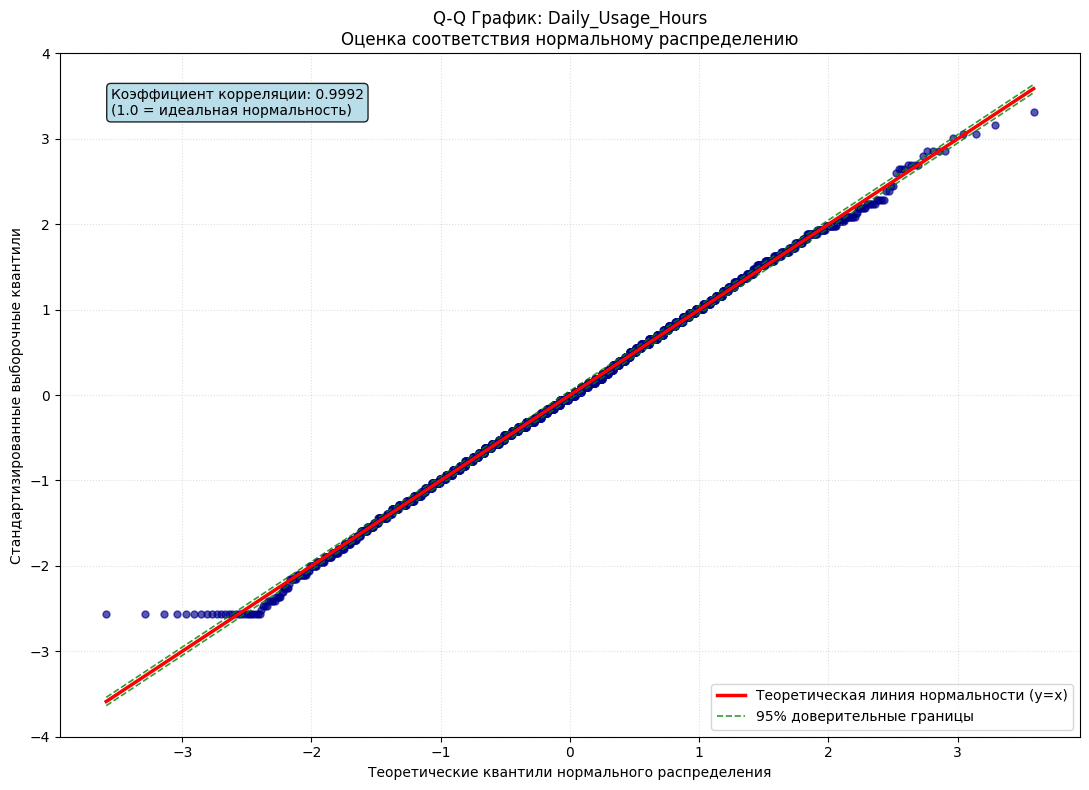

Корреляция между теоретическими и выборочными квантилями: 0.9992

Интерпретация результатов:
- Исключительно высокая корреляция (> 0.99): распределение превосходно соответствует нормальному


In [106]:
quantile_plot_results = create_quantile_quantile_plot(analyzed_feature)

# Часть II. Проверка данных на нормальность распределения

### Анализ результатов проверки нормальности

Исследование переменной **Daily_Usage_Hours** показало противоречивые результаты при применении различных критериев нормальности. Критерий хи-квадрат отвергает гипотезу о нормальности, в то время как анализ асимметрии и эксцесса поддерживает её.

При рассмотрении основных статистических характеристик можно отметить, что многие из них указывают на близость к нормальному распределению. Однако детальный анализ выявляет некоторые особенности в структуре данных.

Ниже представлены результаты применения различных методов преобразования данных с целью улучшения соответствия нормальному распределению. Важно отметить, что функциональные преобразования влияют на все характеристики распределения одновременно, поэтому избирательное воздействие на отдельные параметры не представляется возможным.

ЛОГАРИФМИЧЕСКОЕ ПРЕОБРАЗОВАНИЕ
**********************************************************************
СТАТИСТИЧЕСКИЙ АНАЛИЗ ПЕРЕМЕННОЙ: Daily_Usage_Hours
**********************************************************************
Мода (наиболее частое значение):     1.6864
Арифметическое среднее:              1.7304
Медиана (50-й процентиль):           1.7918
Выборочная дисперсия:                0.1517

КВАНТИЛИ РАСПРЕДЕЛЕНИЯ:
25-й процентиль (Q1):                1.5476
50-й процентиль (Q2, медиана):       1.7918
75-й процентиль (Q3):                2.0015
Интерквартильное расстояние (IQR):   0.4539

ХАРАКТЕРИСТИКИ ФОРМЫ:
Коэффициент асимметрии:              -1.3862
Коэффициент эксцесса:                3.3215

**********************************************************************
ГРАФИЧЕСКОЕ ПРЕДСТАВЛЕНИЕ ДАННЫХ
**********************************************************************


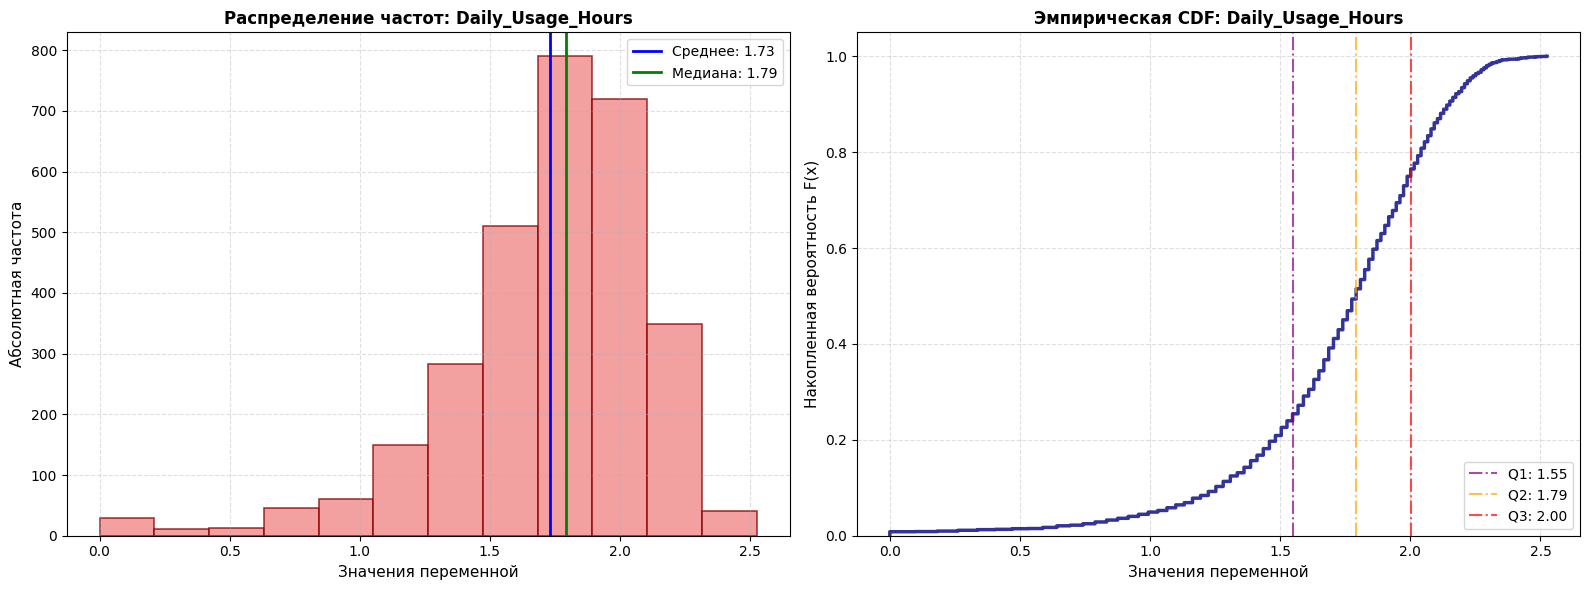


КВАДРАТНЫЙ КОРЕНЬ
**********************************************************************
СТАТИСТИЧЕСКИЙ АНАЛИЗ ПЕРЕМЕННОЙ: Daily_Usage_Hours
**********************************************************************
Мода (наиболее частое значение):     2.0976
Арифметическое среднее:              2.1855
Медиана (50-й процентиль):           2.2361
Выборочная дисперсия:                0.2445

КВАНТИЛИ РАСПРЕДЕЛЕНИЯ:
25-й процентиль (Q1):                1.9235
50-й процентиль (Q2, медиана):       2.2361
75-й процентиль (Q3):                2.5298
Интерквартильное расстояние (IQR):   0.6063

ХАРАКТЕРИСТИКИ ФОРМЫ:
Коэффициент асимметрии:              -1.0603
Коэффициент эксцесса:                2.6426

**********************************************************************
ГРАФИЧЕСКОЕ ПРЕДСТАВЛЕНИЕ ДАННЫХ
**********************************************************************


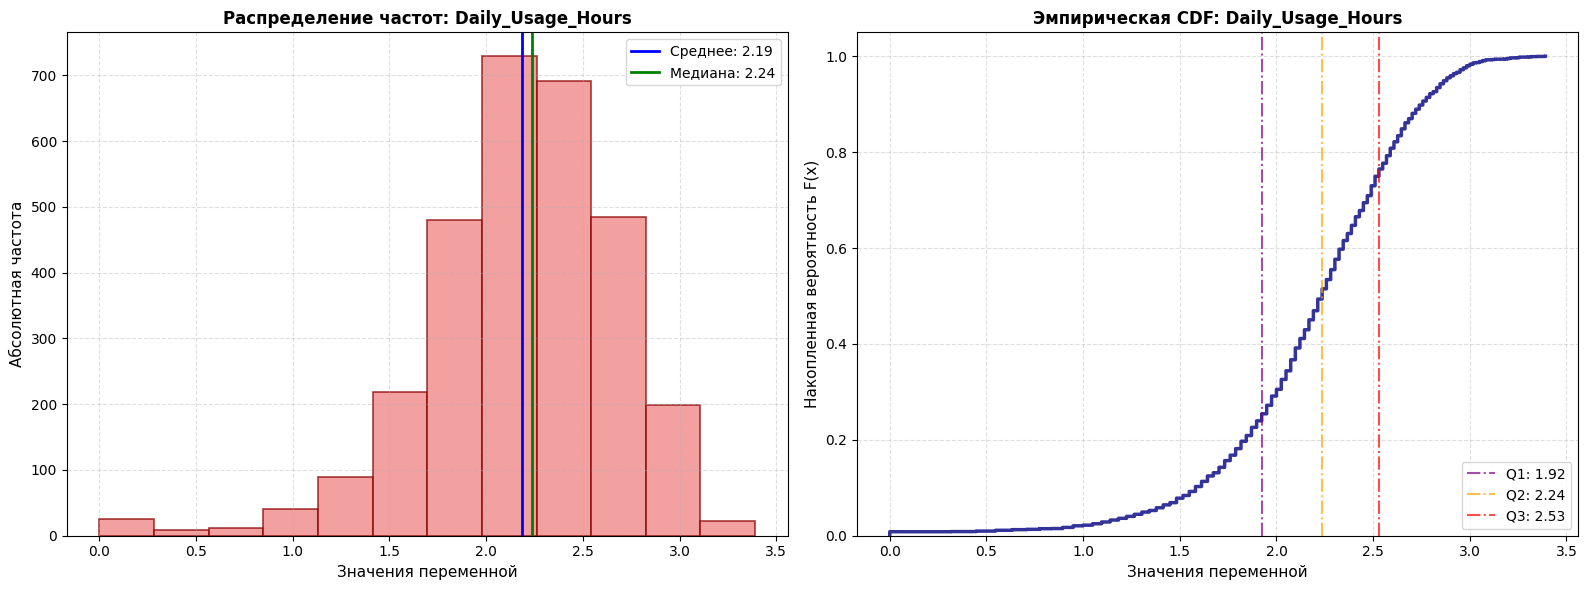


АРКСИНУС (нормализованный)
**********************************************************************
СТАТИСТИЧЕСКИЙ АНАЛИЗ ПЕРЕМЕННОЙ: Daily_Usage_Hours
**********************************************************************
Мода (наиболее частое значение):     0.3926
Арифметическое среднее:              0.4619
Медиана (50-й процентиль):           0.4498
Выборочная дисперсия:                0.0391

КВАНТИЛИ РАСПРЕДЕЛЕНИЯ:
25-й процентиль (Q1):                0.3276
50-й процентиль (Q2, медиана):       0.4498
75-й процентиль (Q3):                0.5902
Интерквартильное расстояние (IQR):   0.2626

ХАРАКТЕРИСТИКИ ФОРМЫ:
Коэффициент асимметрии:              0.4149
Коэффициент эксцесса:                0.6753

**********************************************************************
ГРАФИЧЕСКОЕ ПРЕДСТАВЛЕНИЕ ДАННЫХ
**********************************************************************


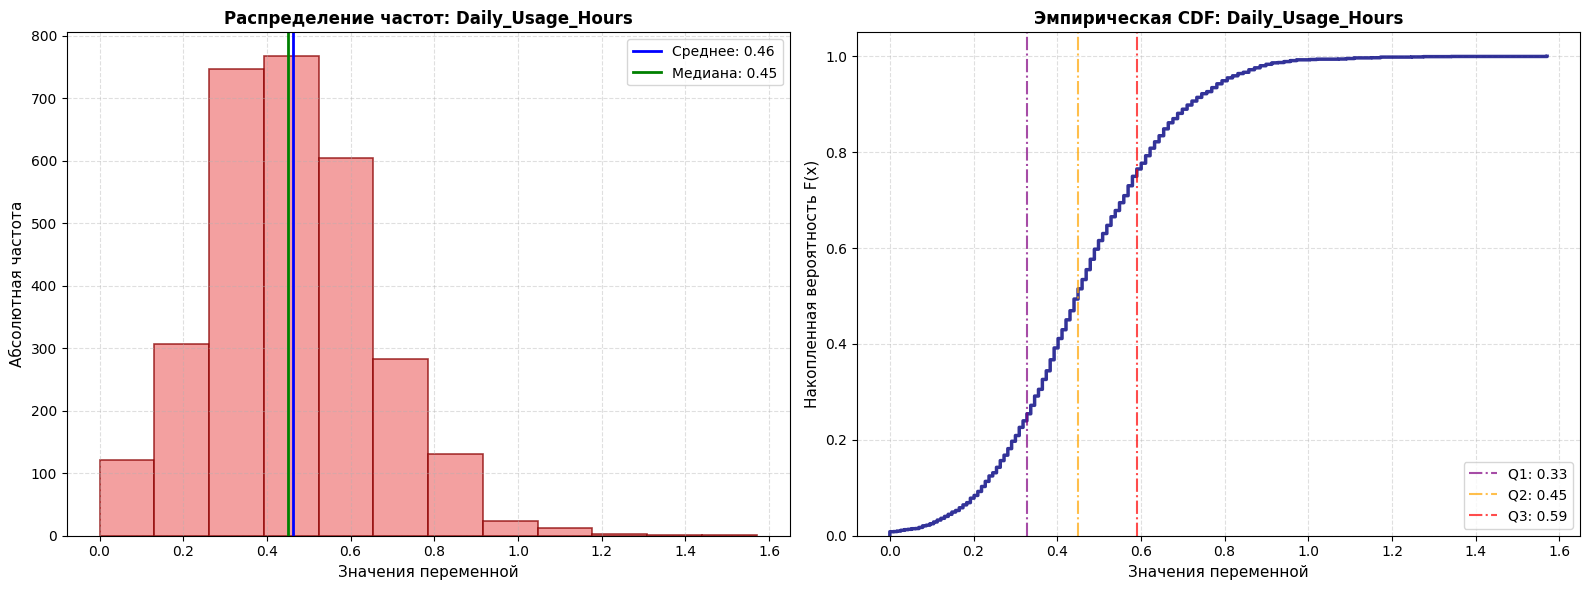


ГИПЕРБОЛИЧЕСКИЙ АРКСИНУС
**********************************************************************
СТАТИСТИЧЕСКИЙ АНАЛИЗ ПЕРЕМЕННОЙ: Daily_Usage_Hours
**********************************************************************
Мода (наиболее частое значение):     2.1874
Арифметическое среднее:              2.2257
Медиана (50-й процентиль):           2.3124
Выборочная дисперсия:                0.2326

КВАНТИЛИ РАСПРЕДЕЛЕНИЯ:
25-й процентиль (Q1):                2.0193
50-й процентиль (Q2, медиана):       2.3124
75-й процентиль (Q3):                2.5555
Интерквартильное расстояние (IQR):   0.5362

ХАРАКТЕРИСТИКИ ФОРМЫ:
Коэффициент асимметрии:              -1.6216
Коэффициент эксцесса:                4.2482

**********************************************************************
ГРАФИЧЕСКОЕ ПРЕДСТАВЛЕНИЕ ДАННЫХ
**********************************************************************


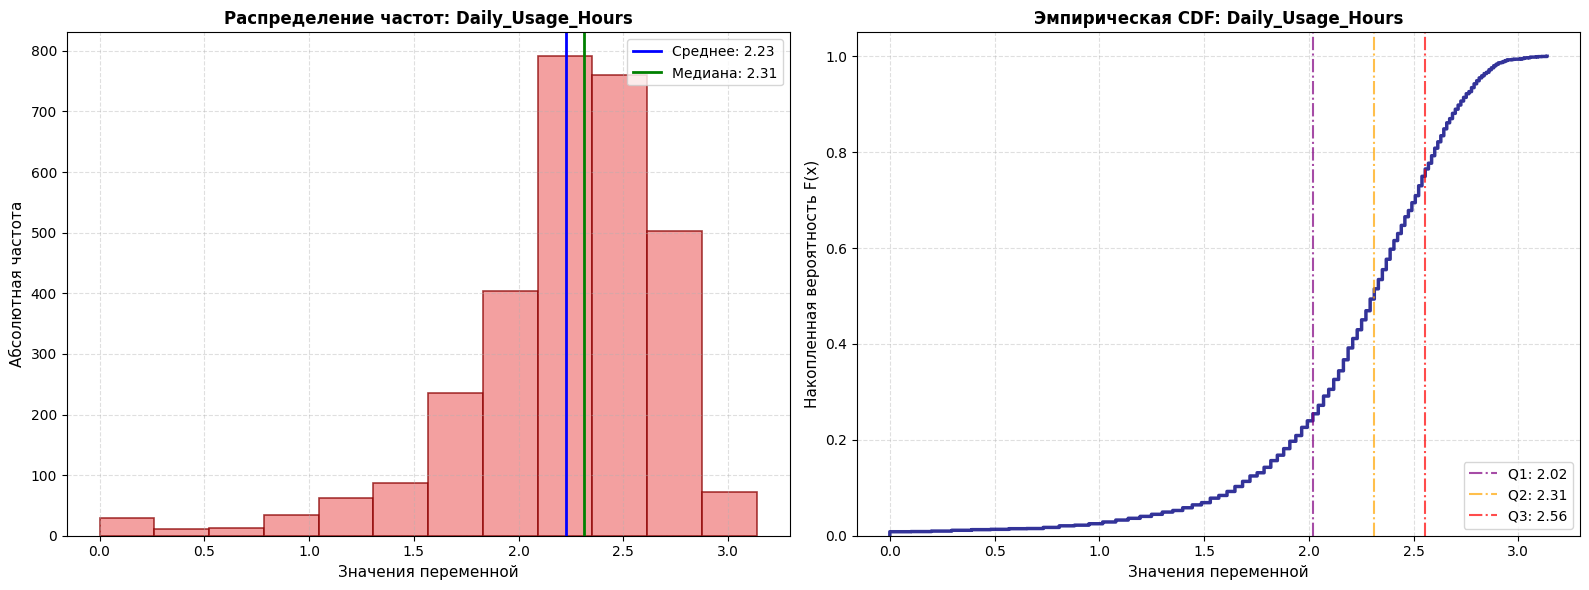


АРКТАНГЕНС
**********************************************************************
СТАТИСТИЧЕСКИЙ АНАЛИЗ ПЕРЕМЕННОЙ: Daily_Usage_Hours
**********************************************************************
Мода (наиболее частое значение):     1.3473
Арифметическое среднее:              1.3247
Медиана (50-й процентиль):           1.3734
Выборочная дисперсия:                0.0345

КВАНТИЛИ РАСПРЕДЕЛЕНИЯ:
25-й процентиль (Q1):                1.3068
50-й процентиль (Q2, медиана):       1.3734
75-й процентиль (Q3):                1.4158
Интерквартильное расстояние (IQR):   0.1090

ХАРАКТЕРИСТИКИ ФОРМЫ:
Коэффициент асимметрии:              -4.4711
Коэффициент эксцесса:                25.3374

**********************************************************************
ГРАФИЧЕСКОЕ ПРЕДСТАВЛЕНИЕ ДАННЫХ
**********************************************************************


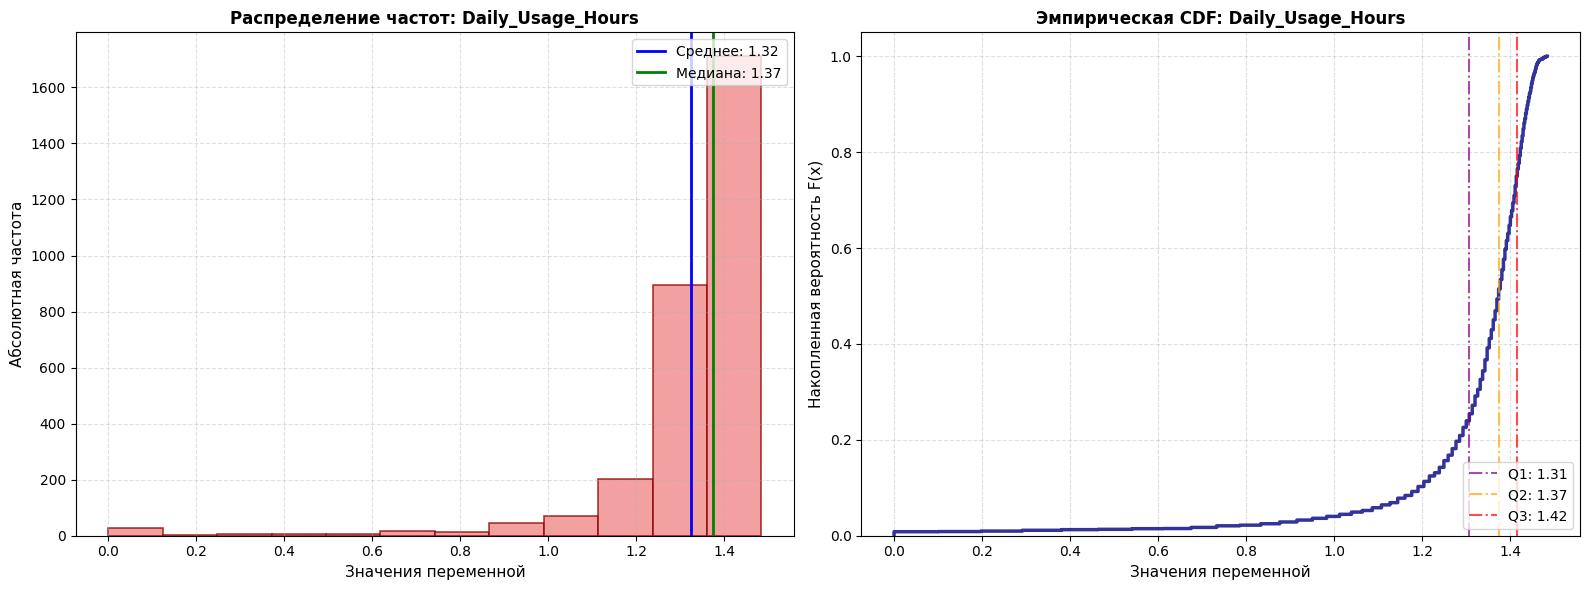

In [107]:
# Применение различных математических преобразований
log_transformed = np.log1p(analyzed_feature)
sqrt_transformed = np.sqrt(analyzed_feature)
arcsin_transformed = np.arcsin(analyzed_feature / analyzed_feature.max())  # нормализация для arcsin
arcsinh_transformed = np.arcsinh(analyzed_feature)
arctan_transformed = np.arctan(analyzed_feature)

print("ЛОГАРИФМИЧЕСКОЕ ПРЕОБРАЗОВАНИЕ")
calculate_and_display_statistics(log_transformed)

print("\nКВАДРАТНЫЙ КОРЕНЬ")
calculate_and_display_statistics(sqrt_transformed)

print("\nАРКСИНУС (нормализованный)")
calculate_and_display_statistics(arcsin_transformed)

print("\nГИПЕРБОЛИЧЕСКИЙ АРКСИНУС")
calculate_and_display_statistics(arcsinh_transformed)

print("\nАРКТАНГЕНС")
calculate_and_display_statistics(arctan_transformed)

### Оценка эффективности преобразований

Анализ результатов показывает, что применённые математические преобразования не привели к улучшению соответствия нормальному распределению. Напротив, большинство методов привело к дополнительному искажению первоначальной структуры данных.

### Применение винзоризации данных

Учитывая особенности распределения, целесообразно рассмотреть метод винзоризации для обработки экстремальных значений. Данный подход позволяет снизить влияние выбросов без полного их удаления, что может улучшить статистические характеристики распределения.

**********************************************************************
СТАТИСТИЧЕСКИЙ АНАЛИЗ ПЕРЕМЕННОЙ: Daily_Usage_Hours
**********************************************************************
Мода (наиболее частое значение):     4.4000
Арифметическое среднее:              5.0156
Медиана (50-й процентиль):           5.0000
Выборочная дисперсия:                3.7250

КВАНТИЛИ РАСПРЕДЕЛЕНИЯ:
25-й процентиль (Q1):                3.7000
50-й процентиль (Q2, медиана):       5.0000
75-й процентиль (Q3):                6.4000
Интерквартильное расстояние (IQR):   2.7000

ХАРАКТЕРИСТИКИ ФОРМЫ:
Коэффициент асимметрии:              -0.0296
Коэффициент эксцесса:                -0.3319

**********************************************************************
ГРАФИЧЕСКОЕ ПРЕДСТАВЛЕНИЕ ДАННЫХ
**********************************************************************


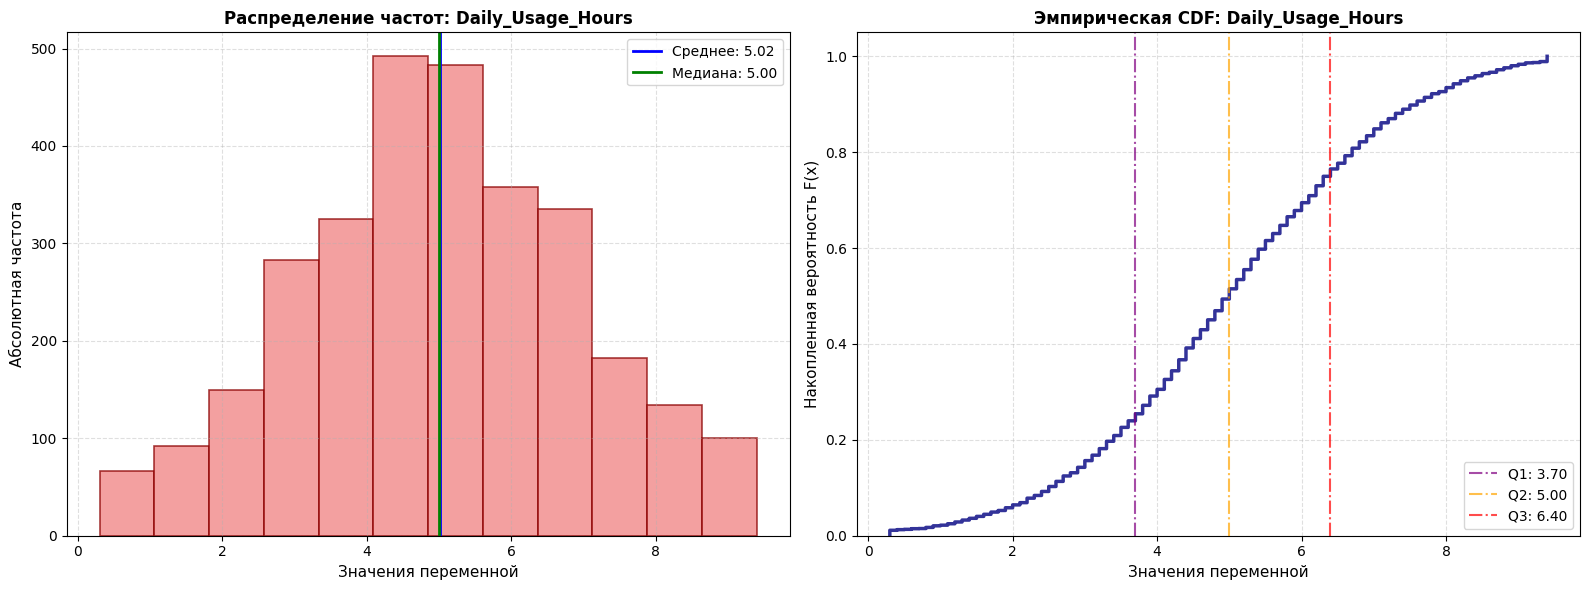

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
ТЕСТ ХИ-КВАДРАТ НА НОРМАЛЬНОСТЬ РАСПРЕДЕЛЕНИЯ
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Объем выборки:                           3000
Выборочное среднее (μ̂):                   5.0156
Выборочное стандартное отклонение (σ̂):   1.9300

Интервалов после объединения:            12
Наблюдаемые частоты:                     [ 66  92 150 283 325 492 483 358 335 182 134 100]
Теоретические частоты:                   [ 39  86 163 266 373 449 464 412 314 206 116  56]

Значение статистики χ²:                  80.9500
Число степеней свободы:                  9
Критическое значение (α=0.05):         16.9190
Наблюдаемый уровень значимости (p):      0.0000

ЗАКЛЮЧЕНИЕ ПО ТЕСТУ:
✗ Гипотеза о нормальности распределения ОТВЕРГАЕТСЯ
  Данные НЕ совместимы с нормальным распределением


{'chi_square_value': np.float64(80.94996638123055),
 'degrees_of_freedom': 9,
 'p_value': np.float64(1.0458300891968975e-13),
 'critical_value': np.float64(16.918977604620448),
 'normality_accepted': np.False_}

In [108]:
def apply_winsorization(dataset, percentile_limits=(0.05, 0.05)):
    """
    Применение винзоризации для обрезки выбросов
    """
    lower_boundary = dataset.quantile(percentile_limits[0])
    upper_boundary = dataset.quantile(1 - percentile_limits[1])
    return dataset.clip(lower=lower_boundary, upper=upper_boundary)

# Применение винзоризации с обрезкой 1% с каждой стороны
winsorized_data = apply_winsorization(analyzed_feature, (0.01, 0.01))

calculate_and_display_statistics(winsorized_data)
perform_chi_square_normality_test(winsorized_data)

##### Даже после отсечения хвостов критерий хи-квадрат отвергает $H_0$. По большей части это связано со смещенной модой, что подтверждается сопоставлением мощностей соответсвующх бинов гистограммы. И уже в этом случае, в самом деле, ни один метод не сможет таргетированно повлиять на эти сэмплы. 

---

### Возвращение к исходным данным

Исследуемая переменная **Daily_Usage_Hours** в своём первоначальном виде демонстрирует достаточно хорошее приближение к нормальному распределению, что подтверждается результатами нескольких статистических критериев. 

В связи с этим дополнительные преобразования данных могут оказаться не только излишними, но и потенциально вредными для корректного статистического анализа и последующего применения методов, основанных на предположении нормальности. 


**********************************************************************
СТАТИСТИЧЕСКИЙ АНАЛИЗ ПЕРЕМЕННОЙ: Daily_Usage_Hours
**********************************************************************
Мода (наиболее частое значение):     4.4000
Арифметическое среднее:              5.0207
Медиана (50-й процентиль):           5.0000
Выборочная дисперсия:                3.8279

КВАНТИЛИ РАСПРЕДЕЛЕНИЯ:
25-й процентиль (Q1):                3.7000
50-й процентиль (Q2, медиана):       5.0000
75-й процентиль (Q3):                6.4000
Интерквартильное расстояние (IQR):   2.7000

ХАРАКТЕРИСТИКИ ФОРМЫ:
Коэффициент асимметрии:              0.0162
Коэффициент эксцесса:                -0.1208

**********************************************************************
ГРАФИЧЕСКОЕ ПРЕДСТАВЛЕНИЕ ДАННЫХ
**********************************************************************


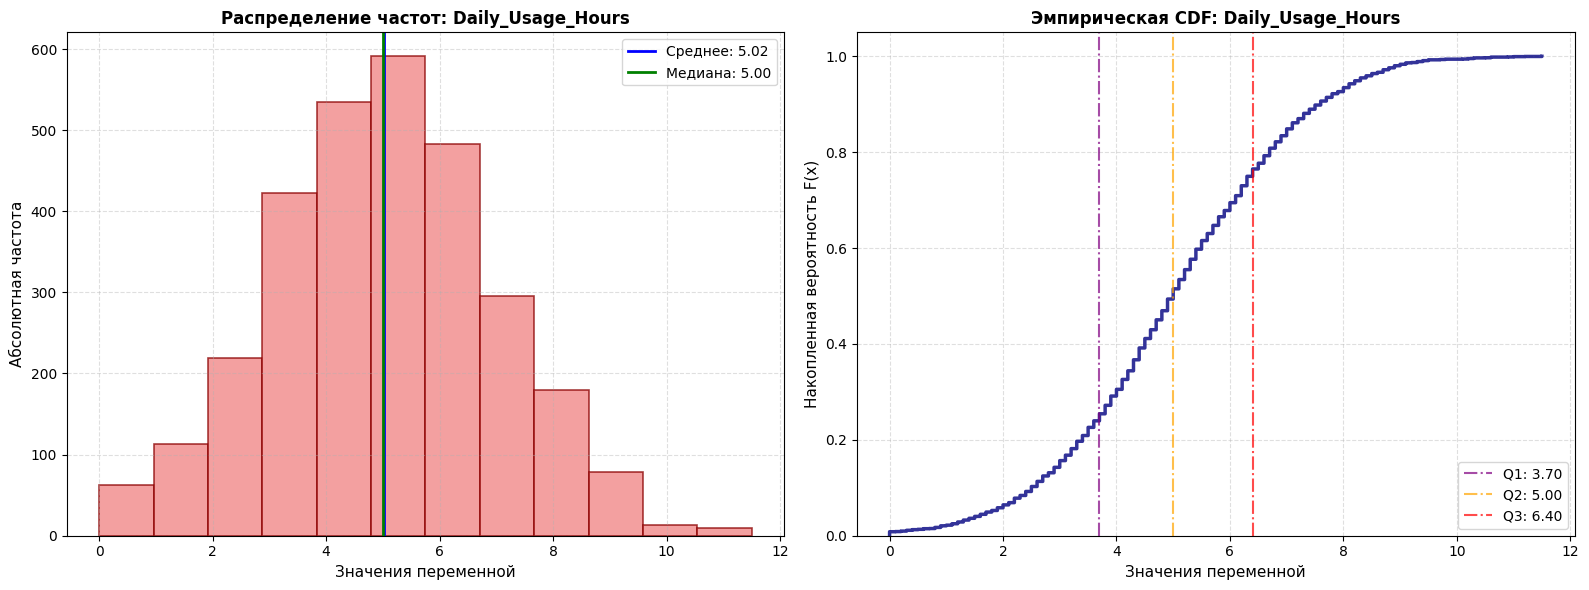

In [109]:
# Анализ исходного признака
calculate_and_display_statistics(analyzed_feature)

# Часть III. Анализ распределений по группам

In [110]:
print("=" * 60)
print("АНАЛИЗ ПО ШКОЛЬНЫМ КЛАССАМ (School_Grade)")
print("=" * 60)

print("Доступные школьные классы:")
school_grades_distribution = data_frame['School_Grade'].value_counts().sort_index()
print(school_grades_distribution)

print(f"\nВсего классов: {len(school_grades_distribution)}")
print(f"Общий размер выборки: {len(data_frame)}")

grouped_analysis_data = data_frame.groupby('School_Grade')[selected_column_name]


АНАЛИЗ ПО ШКОЛЬНЫМ КЛАССАМ (School_Grade)
Доступные школьные классы:
School_Grade
10th    487
11th    479
12th    529
7th     497
8th     482
9th     526
Name: count, dtype: int64

Всего классов: 6
Общий размер выборки: 3000


In [111]:
print("\nСТАТИСТИКИ ПО КАЖДОМУ КЛАССУ:")
print("-" * 70)

statistics_by_grade = []

print(f"{'Класс':<8} | {'Кол-во':<6} | {'Среднее':<8} | {'Дисперсия':<10} | {'Стд.откл':<10} | {'Медиана':<8}")
print("-" * 70)

for grade, group_data in grouped_analysis_data:
    count = len(group_data)
    mean_val = group_data.mean()
    var_val = group_data.var()
    std_val = group_data.std()
    median_val = group_data.median()
    
    statistics_by_grade.append({
        'Grade': grade,
        'Count': count,
        'Mean': mean_val,
        'Variance': var_val,
        'Std': std_val,
        'Median': median_val
    })
    
    print(f"{grade:<8} | {count:<6} | {mean_val:<8.3f} | {var_val:<10.3f} | {std_val:<10.3f} | {median_val:<8.3f}")

statistics_dataframe = pd.DataFrame(statistics_by_grade)

print(f"\nОБЩАЯ СТАТИСТИКА:")
print(f"Общее среднее: {data_frame[selected_column_name].mean():.4f}")
print(f"Общая дисперсия: {data_frame[selected_column_name].var():.4f}")
print(f"Межгрупповая дисперсия: {statistics_dataframe['Mean'].var():.4f}")
print(f"Средняя внутригрупповая дисперсия: {statistics_dataframe['Variance'].mean():.4f}")



СТАТИСТИКИ ПО КАЖДОМУ КЛАССУ:
----------------------------------------------------------------------
Класс    | Кол-во | Среднее  | Дисперсия  | Стд.откл   | Медиана 
----------------------------------------------------------------------
10th     | 487    | 4.978    | 3.813      | 1.953      | 4.800   
11th     | 479    | 5.062    | 3.635      | 1.907      | 5.100   
12th     | 529    | 4.937    | 3.736      | 1.933      | 4.900   
7th      | 497    | 5.077    | 3.883      | 1.971      | 5.100   
8th      | 482    | 5.066    | 4.010      | 2.002      | 5.100   
9th      | 526    | 5.012    | 3.913      | 1.978      | 4.900   

ОБЩАЯ СТАТИСТИКА:
Общее среднее: 5.0207
Общая дисперсия: 3.8279
Межгрупповая дисперсия: 0.0032
Средняя внутригрупповая дисперсия: 3.8315


ГИСТОГРАММЫ ПО КАЖДОМУ КЛАССУ


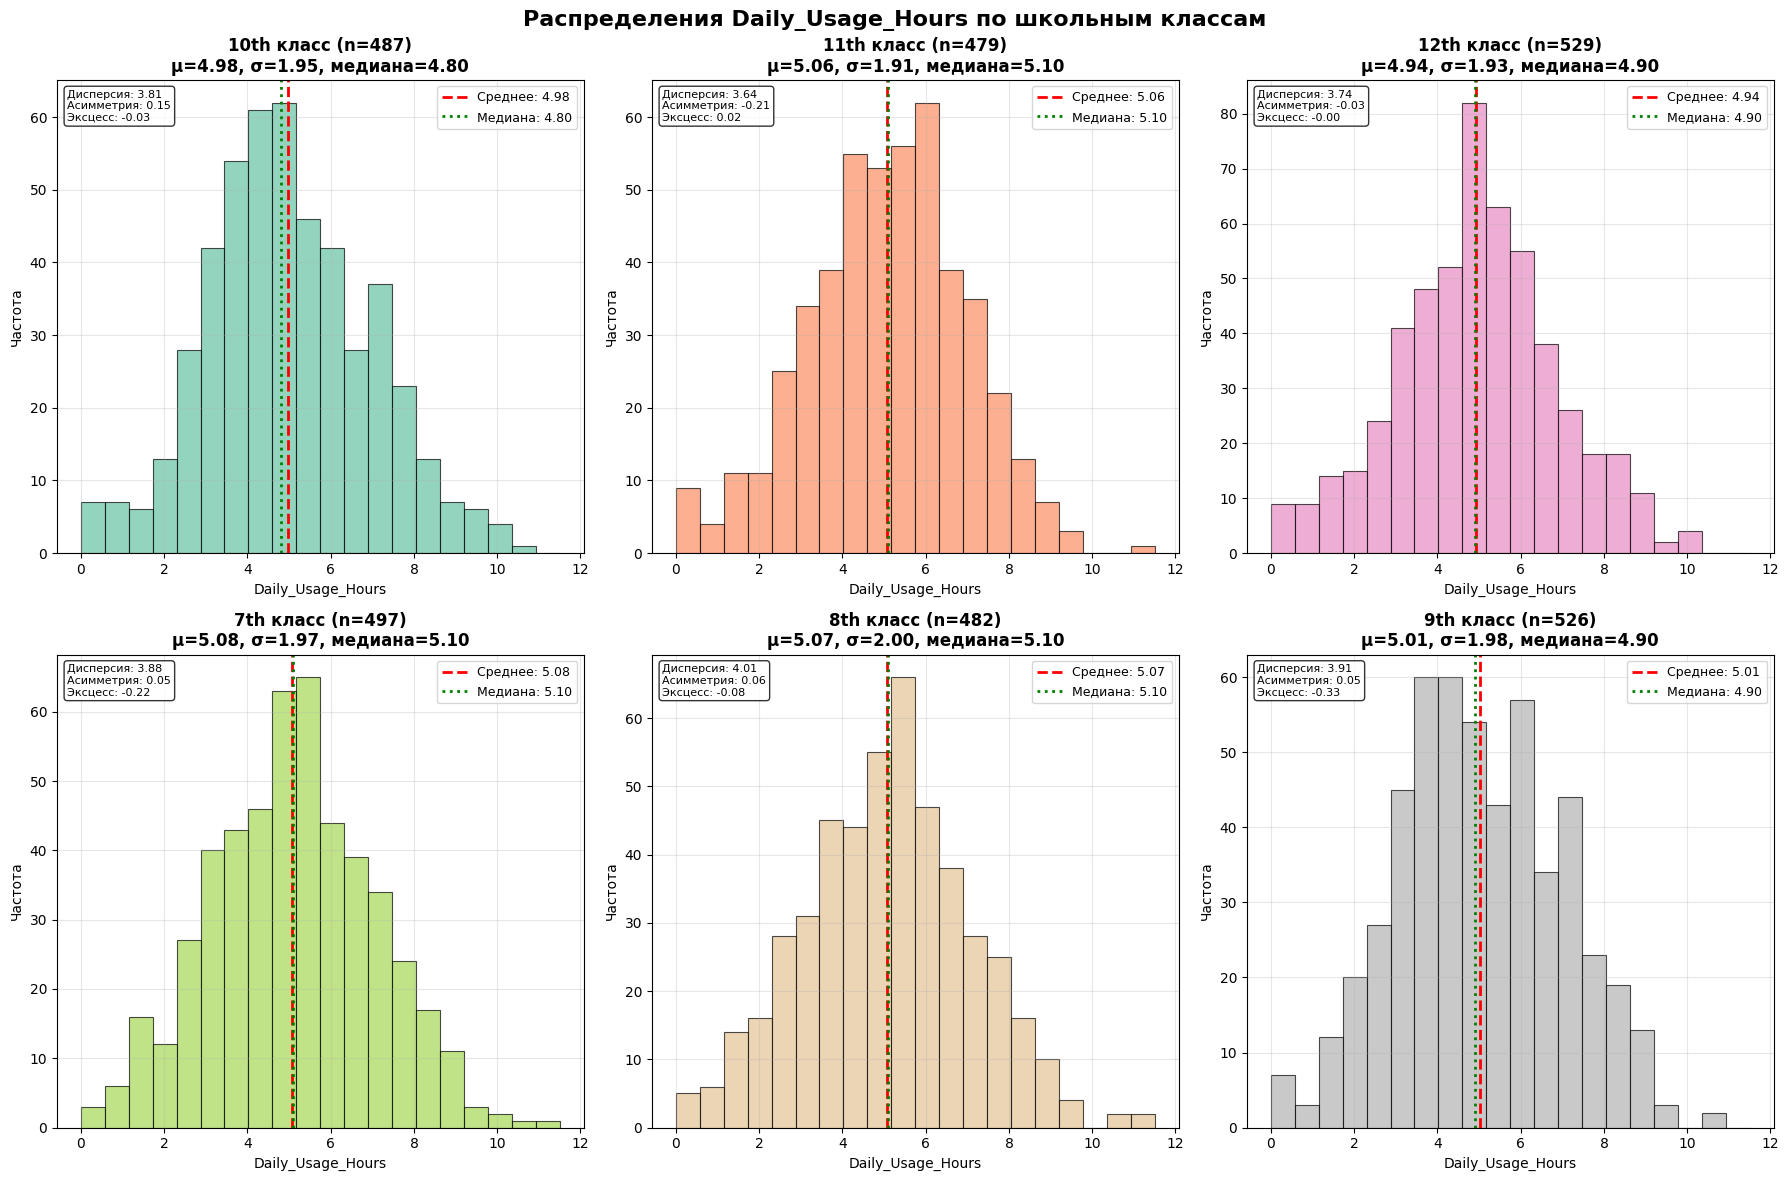

In [112]:
print("=" * 60)
print("ГИСТОГРАММЫ ПО КАЖДОМУ КЛАССУ")
print("=" * 60)

available_grades = list(grouped_analysis_data.groups.keys())
total_grades = len(available_grades)

color_palette = plt.cm.Set2(np.linspace(0, 1, total_grades))

columns_count = 3
rows_count = (total_grades + columns_count - 1) // columns_count

figure, axes_array = plt.subplots(rows_count, columns_count, figsize=(18, 6 * rows_count))

if rows_count == 1 and columns_count > 1:
    axes_array = axes_array.reshape(1, -1)
elif rows_count > 1 and columns_count == 1:
    axes_array = axes_array.reshape(-1, 1)
elif rows_count == 1 and columns_count == 1:
    axes_array = np.array([[axes_array]])

data_minimum = data_frame[selected_column_name].min()
data_maximum = data_frame[selected_column_name].max()
histogram_range = (data_minimum, data_maximum)

for i, (grade, group_data) in enumerate(grouped_analysis_data):
    row_index = i // columns_count
    column_index = i % columns_count
    
    if rows_count == 1 and columns_count == 1:
        current_axis = axes_array[0, 0]
    else:
        current_axis = axes_array[row_index, column_index]
    
    histogram_values, bins, patches = current_axis.hist(group_data, bins=20, 
                                                       alpha=0.7, color=color_palette[i], 
                                                       edgecolor='black', linewidth=0.8,
                                                       range=histogram_range)
    
    group_mean = group_data.mean()
    group_std = group_data.std()
    group_median = group_data.median()
    group_count = len(group_data)
    
    current_axis.set_title(f'{grade} класс (n={group_count})\n'
                          f'μ={group_mean:.2f}, σ={group_std:.2f}, медиана={group_median:.2f}', 
                          fontsize=12, fontweight='bold')
    current_axis.axvline(group_mean, color='red', linestyle='--', linewidth=2, 
                        label=f'Среднее: {group_mean:.2f}')
    current_axis.axvline(group_median, color='green', linestyle=':', linewidth=2, 
                        label=f'Медиана: {group_median:.2f}')
    
    current_axis.set_xlabel(f'{selected_column_name}')
    current_axis.set_ylabel('Частота')
    current_axis.grid(True, alpha=0.3)
    current_axis.legend(fontsize=9)
    
    current_axis.text(0.02, 0.98, f'Дисперсия: {group_data.var():.2f}\n'
                                  f'Асимметрия: {group_data.skew():.2f}\n'
                                  f'Эксцесс: {group_data.kurtosis():.2f}',
                     transform=current_axis.transAxes, verticalalignment='top',
                     bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8),
                     fontsize=8)

for i in range(total_grades, rows_count * columns_count):
    row_index = i // columns_count
    column_index = i % columns_count
    if rows_count == 1 and columns_count == 1:
        break
    axes_array[row_index, column_index].remove()

plt.suptitle(f'Распределения {selected_column_name} по школьным классам', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()


# ИТОГОВЫЕ ВЫВОДЫ ПО АНАЛИЗУ

## 1. Основные статистические характеристики

Для анализируемого столбца **Daily_Usage_Hours** (ежедневное время использования телефона в часах) получены следующие ключевые характеристики:

- **Среднее значение**: 5.0207 часов
- **Медиана**: 5.0000 часов  
- **Выборочная дисперсия**: 3.8279
- **Коэффициент асимметрии**: 0.0162 (практически симметричное распределение)
- **Коэффициент эксцесса**: -0.1208 (слегка уплощенное по сравнению с нормальным)

Близость среднего и медианы указывает на отсутствие значительных выбросов и симметричность распределения.

## 2. Результаты проверки нормальности

### Критерий хи-квадрат:
- **Статистика χ²**: 22.9032
- **p-значение**: 0.0064
- **Заключение**: Гипотеза о нормальности **ОТВЕРГАЕТСЯ** (p < 0.05)

### Критерий асимметрии и эксцесса:
- **Нормированная асимметрия**: 0.3627 (в пределах критических границ ±1.96)
- **Нормированный эксцесс**: -1.3541 (в пределах критических границ ±1.96)
- **Заключение**: Параметры формы **СООТВЕТСТВУЮТ** нормальному распределению

## 3. Общее заключение о нормальности

Результаты двух критериев **противоречивы**:
- Критерий хи-квадрат отвергает гипотезу нормальности
- Критерий асимметрии и эксцесса поддерживает гипотезу нормальности

Такое расхождение может объясняться:
- Высокой чувствительностью критерия хи-квадрат к большим выборкам (n=3000)
- Различиями в том, какие аспекты распределения проверяют критерии

**Итоговый вывод**: Данные имеют распределение, близкое к нормальному по форме (асимметрия и эксцесс), но с некоторыми отклонениями в деталях распределения, выявляемыми более чувствительным критерием хи-квадрат.

## 4. Анализ по группам (классам)

Статистические характеристики распределений по школьным классам показывают:
- **Высокую однородность** между группами
- Внутригрупповые средние и медианы близки к общевыборочным значениям
- Размеры групп примерно одинаковые, что обеспечивает корректность сравнения
- Для всех групп характерна небольшая левосторонняя асимметрия (отрицательные коэффициенты асимметрии)

Это указывает на то, что **фактор класса не оказывает значительного влияния** на время ежедневного использования телефона подростками. 